# 42B Optimizing Neural Networks
- Callbacks, gridsearchm, etc

## Questions

- Tried and true way to update your network to address exploding / vanishing gradients?
    - Exploding gradient:
        - MinMaxScaling
    - **Vanishing gradient:**
        - TBC ?
        
- Remember that R-squared is a metric available for Regressions (evaluating regression models). 
    - `from sklearn.metrics import r2_score`

-

# STUDY GROUP RESOURCES


- [NOTEBOOK: This Notebook on Google Colab](https://drive.google.com/file/d/1rxkuydyd_wNdiuKh22-e6mr-zlsRVC1N/view?usp=sharing)
- [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)



## LEARNING OBJECTIVES

- Learn about the retina /human visual system
- Relate human to CNNS
- Discuss using colab/colab pro 
- Fitting, evaluating, saving CNNs
- Transfer Learning & Pre-trained Networks 

# Loading in the data

- [Google Drive Link to zip file](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4 )


In [44]:
import os,glob
print(os.path.abspath(os.curdir))

/Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/fsds_pt_100719_cohort_notes/Instructor Notebooks/Mod_4_v21/ANNs


### To Get the Data
- Download the zip file 
    - [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- Extract zip file contents to the a folder on your computer.
    - I am using my user folder > Datasets > cats-vs-dogs
    

In [45]:
# change dataset_folder to match where you stored the files
dataset_folder = "/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"
os.makedirs(dataset_folder,exist_ok=True)
# os.listdir(dataset_folder)

# Installs, Imports, & Functions

In [46]:
# # !pip install -U imageio
# # !pip install -U scikit-image

# !pip install pillow
# !pip install opencv-contrib-python
# !pip install -U fsds
# !pip install -U tensorflow

# !pip install -U keras
# !pip install -U pandas 
# !pip install -U pandas-profiling

# # %conda update matploltib
# !pip install -U matplotlib

In [47]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

In [48]:
!pip install -U fsds_100719
from fsds_100719.imports import *

Requirement already up-to-date: fsds_100719 in /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.7.21)


# Functions from Class

- Updated plot_keras_history (works with 'acc' or 'accuracy' metric name)
- 

In [49]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_keras_history(history,figsize=(10,4),subplot_kws={}):
    
    if hasattr(history,'history'):
        history=history.history
    try:
        acc_keys = list(filter(lambda x: 'acc' in x,history.keys()))
    except:
        print('No acc keys found')
        pass
    try:
        loss_keys = list(filter(lambda x: 'loss' in x,history.keys()))
    except:
        print('No loss keys found')

        pass
    
    plot_me = pd.DataFrame(history)
    
    fig,axes=plt.subplots(ncols=2,figsize=figsize,**subplot_kws)
    axes = axes.flatten()

    y_labels= ['Accuracy','Loss']
    for a, metric in enumerate([acc_keys,loss_keys]):
        for i in range(len(metric)):
            ax = pd.Series(history[metric[i]],
                        name=metric[i]).plot(ax=axes[a],label=metric[i])
    [ax.legend() for ax in axes]
    [ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) for ax in axes]
    [ax.set(xlabel='Epochs') for ax in axes]
    plt.suptitle('Model Training Results',y=1.01)
    plt.tight_layout()
    plt.show()
    return plt.gcf()


def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig


    

class Timer():
    ## def init
    def __init__(self,format_="%m/%d/%y - %I:%M %p"):
        import tzlocal
        self.tz = tzlocal.get_localzone()
        self.fmt = format_
        
        self.created_at = self.get_time()# get time
        

    
    ## def get time method
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(self.tz)

    ## def start
    def start(self):
        time = self.get_time()
        self.start = time
        print(f"[i] Timer started at{self.start.strftime(self.fmt)}")
        
        

    ## def stop
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i] Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total time = {self.end-self.start}")

# Defining Folder Structure

In [50]:
base_folder = dataset_folder
base_folder

'/Users/jamesirving/Datasets/dogs-vs-cats-sorted/'

In [51]:
# ## dataset
# base_folder = r'dogs-vs-cats-sorted/'#My Drive/Datasets/dogs-vs-cats-sorted/'
# os.listdir(base_folder)

## Preparing Images Using .flow instead of flow_from_directory
- https://discuss.analyticsvidhya.com/t/keras-image-preprocessing-using-flow-and-not-flow-from-directory/69460/2


In [52]:
import shutil
# ## DOG VS CAT
train_base_dir = base_folder+'training_set/'
test_base_dir =base_folder+'test_set/' 

train_dogs = train_base_dir+'dogs/'
train_cats = train_base_dir+'cats/'

test_dogs = test_base_dir+'dogs/'
test_cats = test_base_dir+'cats/'


In [53]:
if os.listdir(train_base_dir):
    print(True)

True


In [54]:
import cv2,glob,os
dog_train_files = glob.glob(train_dogs+'*.jpg')
cat_train_files = glob.glob(train_cats+'*.jpg')
all_train_files = [*dog_train_files,*cat_train_files]

dog_test_files = glob.glob(test_dogs+'*.jpg')
cat_test_files = glob.glob(test_cats+'*.jpg')
all_test_files = [*dog_test_files,*cat_test_files]

# print(len(img_filenames))
# img_filenames[:10]

all_filename_vars = [dog_train_files, cat_train_files,
                        dog_test_files,cat_test_files]

In [55]:
def load_image_cv2(filename, RGB=True):
    """Loads image using cv2 and converts to either matplotlib-RGB (default)
    or grayscale."""
    import cv2

    IMG = cv2.imread(filename)
    if RGB: cmap = cv2.COLOR_BGR2RGB
    else: cmap=cv2.COLOR_BGR2GRAY
    return cv2.cvtColor(IMG,cmap)

In [56]:
from PIL import Image
from keras.preprocessing import image
from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm
from keras.utils import to_categorical

# defining a function to read images
def read_img(img_path,target_size=(32,32,3)):#(64, 64, 3)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)

    return img

def load_train_test_val(dog_training_filenames, cat_training_filenames,
                        dog_test_filenames,cat_test_filenames,
                        img_size=(32,32,3),val_size=0.1):
    """Reads in training and test filenames to produce X and y data splits.
    The validation set is intended to be used during training and is created
    from the training images using train test split.

    ylabels are encoded as 0=cat, 1=dog
    Returns:  X_train, X_test, X_val, y_train, y_test,y_val"""
    # 
    
    display('[i] LOADING IMAGES')
 
    train_img = []
    train_label = []

    for img_path in tqdm(dog_training_filenames):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(1)

    for img_path in tqdm(cat_training_filenames):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(0)


    test_img = []
    test_label = []

    for img_path in tqdm(dog_test_files):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(1)

    for img_path in tqdm(dog_test_files):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(0)
    # print('\n',pd.Series(train_label).value_counts())


    from sklearn.model_selection import train_test_split
    X = np.array(train_img, np.float32)
    y = np.array(train_label)
    y = to_categorical(y)
    
    X_test = np.array(test_img, np.float32)
    y_test = to_categorical(np.array(test_label))
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)
    print('\n[i] Length of Splits:')
    print(f"X_train={len(X_train)}, X_test={len(X_test)}, X_val={len(X_val)}")
    return X_train, X_test, X_val, y_train, y_test,y_val 


def train_test_val_datagens(X_train,X_test,X_val,y_train,y_test,y_val,
                            BATCH_SIZE = 32, train_datagen_kws= dict(
                                shear_range = 0.2, 
                                zoom_range = 0.2,
                                horizontal_flip = True)):
    """Creates ImageDataGenerators for train,test,val data.
    Returns: training_set,test_set,val_set"""
    ## Create training and test data
    from keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1./255,**train_datagen_kws)

    test_datagen = ImageDataGenerator(rescale = 1./255)
    val_datagen = ImageDataGenerator(rescale = 1./255)

    training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
    test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
    val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

    return training_set,test_set,val_set



def get_shapes_dict(training_set,verbose=False):
    shapes = ["Batchsize", "img_width","img_height","img_dim"]
    SHAPES = dict(zip(shapes, training_set[0][0].shape))
    if verbose:
        print('SHAPES DICT:')
        print(SHAPES)
        print(training_set[0][0].shape)
        print('\n[i] Labels for batch (0=cat,1=dog)')
        print(training_set[0][1])
    return SHAPES
      

In [57]:
## USING FUNCTIONS TO LOAD IN IMAGES 
X_train,X_test,X_val,y_train,y_test,y_val = load_train_test_val(*all_filename_vars,
                                                  val_size=0.1,img_size=(32,32,3))#(64,64,3))

train_test_val_vars = [X_train,X_test,X_val,y_train,y_test,y_val ]


'[i] LOADING IMAGES'

100%|██████████| 1000/1000 [00:01<00:00, 558.28it/s]



[i] Length of Splits:
X_train=7200, X_test=2000, X_val=800


In [58]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [59]:
ex_img = X_train[0]
ex_img.shape
ex_img.shape[0] *ex_img.shape[1]*ex_img.shape[2]

3072

In [60]:
ex_img = X_train[0]
num_images = X_train.shape[0]
num_images_test = X_test.shape[0]
len_unrowed = ex_img.shape[0] *ex_img.shape[1]*ex_img.shape[2]
num_images,num_images_test, len_unrowed

(7200, 2000, 3072)

In [61]:
X_train.shape

(7200, 32, 32, 3)

In [62]:
X_train[0].shape, 32*32*3

((32, 32, 3), 3072)

In [63]:
X_train_img  = X_train.reshape(num_images,len_unrowed).astype('float32')/255
X_train_img.shape

(7200, 3072)

In [64]:
X_val_img  = X_val.reshape(X_val.shape[0],len_unrowed).astype('float32')/255
X_val_img.shape

(800, 3072)

In [65]:
X_test_img = X_test.reshape(num_images_test,len_unrowed).astype('float32')/255
X_test_img.shape

(2000, 3072)

In [66]:
# X_train_img = X_train.reshape(-1,32*32*3)/255
# X_test_img = X_test.reshape(-1,32*32*3)/255
# X_train_img.shape, X_test_img.shape

array([0., 1.], dtype=float32)

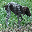

In [67]:
i = np.random.choice(range(len(y_train)))
display(y_train[i])
display(array_to_img(X_train_img[i].reshape(32,32,3)))

In [68]:
# Part 1 - Building the CNN
# Importing the Keras libraries and packages
from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
from keras.layers import Dense

In [69]:
X_train_img[0].shape

(3072,)

In [70]:
X_train_img.shape, y_train.shape

((7200, 3072), (7200, 2))

In [71]:
X_train_img[0].shape

(3072,)

In [72]:
def make_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [73]:

model = make_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


In [74]:
def evaluate_model(y_true, y_pred,history=None):
    
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
    try:    
        if history is not None:
            plot_keras_history(history)
    except:
        pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")

    
    


In [75]:
X_test_img.shape, y_test.shape

((2000, 3072), (2000, 2))

In [76]:
timer = Timer()
model = make_model()
model.summary()
timer.start()
history = model.fit(X_train_img, y_train, epochs=100, batch_size=64, 
                      validation_data=(X_val_img, y_val))
timer.stop()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________
[i] Timer started at05/31/20 - 06:47 PM
Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 0s 33us/step - loss: 0.7071 - accuracy: 0.5304 - val_loss: 0.6839 - val_accuracy: 0.5587
Epoch 2/100
7200/7200 [==============================] - 0s 22us/step - loss: 0.6760 - accuracy: 0.5713 - val_loss: 0.7212 - val_accuracy: 0.4963
Epoch 3/100
7200/7200 [==============================] - 0s 23us/step - loss: 0.6709 - accuracy: 0.5875 - val_loss: 0.6729 - val_ac

Epoch 52/100
7200/7200 [==============================] - 0s 20us/step - loss: 0.5021 - accuracy: 0.7583 - val_loss: 0.7000 - val_accuracy: 0.6062
Epoch 53/100
7200/7200 [==============================] - 0s 19us/step - loss: 0.4980 - accuracy: 0.7599 - val_loss: 0.6775 - val_accuracy: 0.6125
Epoch 54/100
7200/7200 [==============================] - 0s 20us/step - loss: 0.4873 - accuracy: 0.7719 - val_loss: 0.7433 - val_accuracy: 0.5788
Epoch 55/100
7200/7200 [==============================] - 0s 22us/step - loss: 0.4800 - accuracy: 0.7699 - val_loss: 0.6816 - val_accuracy: 0.6100
Epoch 56/100
7200/7200 [==============================] - 0s 21us/step - loss: 0.4802 - accuracy: 0.7704 - val_loss: 0.7600 - val_accuracy: 0.5700
Epoch 57/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.4838 - accuracy: 0.7707 - val_loss: 0.6913 - val_accuracy: 0.5913
Epoch 58/100
7200/7200 [==============================] - 0s 20us/step - loss: 0.4726 - accuracy: 0.7761 - val_loss: 0

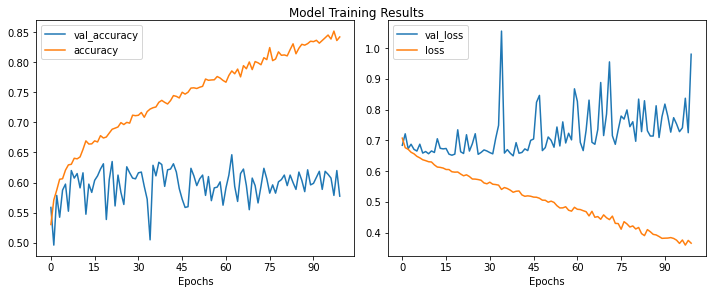



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.10      0.16      1000
           1       0.50      0.90      0.64      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.40      2000
weighted avg       0.50      0.50      0.40      2000



<Figure size 432x288 with 0 Axes>

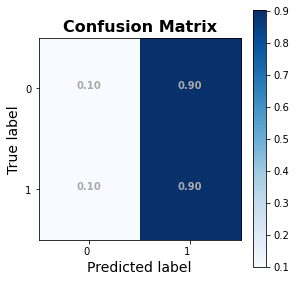

In [77]:
y_hat_test = model.predict(X_test_img)

evaluate_model(y_test,y_hat_test,history)

In [78]:
def make_fit_evaluate_model(build_fn, fit_params = dict(epochs=100,
                                                        batch_size=64)):
    model = build_fn()
    
    timer = Timer()
    model.summary()
    timer.start()
    
    history = model.fit(X_train_img, y_train,**fit_params,
                          validation_data=(X_val_img, y_val))
    timer.stop()
    
    y_hat_test = model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test,history)
    return model,y_hat_test

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________
[i] Timer started at05/31/20 - 06:47 PM
Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 0s 39us/step - loss: 0.6990 - accuracy: 0.5417 - val_loss: 0.6966 - val_accuracy: 0.5487
Epoch 2/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.6757 - accuracy: 0.5706 - val_loss: 0.6778 - val_accuracy: 0.5675
Epoch 3/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.6654 - accuracy: 0.5985 - val_loss: 0.6811 - val_ac

Epoch 52/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.5010 - accuracy: 0.7565 - val_loss: 0.6666 - val_accuracy: 0.6087
Epoch 53/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.4833 - accuracy: 0.7669 - val_loss: 0.7450 - val_accuracy: 0.6000
Epoch 54/100
7200/7200 [==============================] - 0s 26us/step - loss: 0.4880 - accuracy: 0.7640 - val_loss: 0.6567 - val_accuracy: 0.6263
Epoch 55/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.4888 - accuracy: 0.7650 - val_loss: 0.6619 - val_accuracy: 0.6225
Epoch 56/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.4694 - accuracy: 0.7782 - val_loss: 0.7557 - val_accuracy: 0.5813
Epoch 57/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.4822 - accuracy: 0.7681 - val_loss: 0.6740 - val_accuracy: 0.5975
Epoch 58/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7735 - val_loss: 0

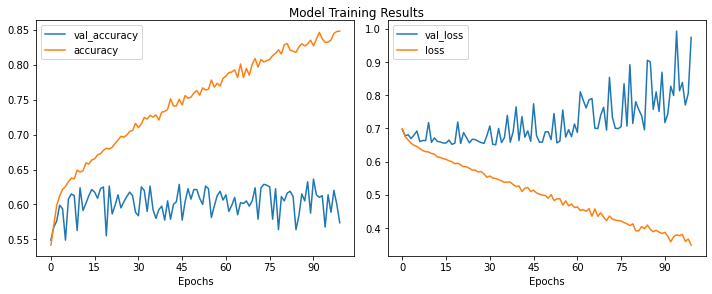



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.11      0.17      1000
           1       0.50      0.89      0.64      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.41      2000
weighted avg       0.50      0.50      0.41      2000



<Figure size 432x288 with 0 Axes>

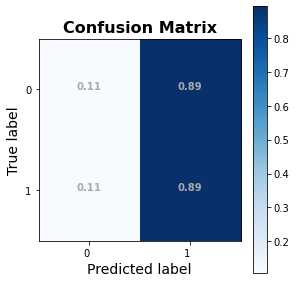

In [79]:
fit_model,model_preds = make_fit_evaluate_model(make_model)

In [80]:
X_val_img

array([[0.24705882, 0.38039216, 0.5254902 , ..., 0.25882354, 0.34117648,
        0.50980395],
       [0.37254903, 0.3882353 , 0.33333334, ..., 0.5529412 , 0.68235296,
        0.7176471 ],
       [0.18431373, 0.07450981, 0.27450982, ..., 0.49411765, 0.49411765,
        0.49411765],
       ...,
       [0.57254905, 0.6117647 , 0.64705884, ..., 0.85490197, 0.654902  ,
        0.54901963],
       [0.5176471 , 0.8       , 0.75686276, ..., 0.37254903, 0.4862745 ,
        0.46666667],
       [0.09411765, 0.09411765, 0.09411765, ..., 0.5647059 , 0.59607846,
        0.6039216 ]], dtype=float32)

## Trying Regularization

### def make_model_optimized

In [81]:
from keras import regularizers
def make_model_optimized(n_units=64,regularizer=regularizers.l2(),
                         optimizer='sgd',activation='relu'):
    params=locals()
    dashes = '---'*25
    print(dashes)
    print(dashes)    
    print('[i] Current Params:')
    print(params)
    print()
    
    model = Sequential()

    model.add(Dense(n_units,activation=activation,
                    input_shape=(X_train_img.shape[1],),
                    kernel_regularizer=regularizer))
    
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])
    return model

---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params:
{'activation': 'relu', 'optimizer': 'sgd', 'regularizer': <keras.regularizers.L1L2 object at 0x15b5e3b38>, 'n_units': 64}

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________
[i] Timer started at05/31/20 - 06:47 PM
Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 0s 45us/step - loss: 1.9193 - accuracy: 0.5417 - val_loss: 1.8796 - val

Epoch 50/100
7200/7200 [==============================] - 0s 30us/step - loss: 0.7339 - accuracy: 0.7047 - val_loss: 0.8349 - val_accuracy: 0.5950
Epoch 51/100
7200/7200 [==============================] - 0s 29us/step - loss: 0.7175 - accuracy: 0.7186 - val_loss: 0.9501 - val_accuracy: 0.5325
Epoch 52/100
7200/7200 [==============================] - 0s 29us/step - loss: 0.7164 - accuracy: 0.7135 - val_loss: 0.7991 - val_accuracy: 0.6263
Epoch 53/100
7200/7200 [==============================] - 0s 32us/step - loss: 0.7188 - accuracy: 0.7079 - val_loss: 0.8110 - val_accuracy: 0.6162
Epoch 54/100
7200/7200 [==============================] - 0s 33us/step - loss: 0.7058 - accuracy: 0.7108 - val_loss: 0.8189 - val_accuracy: 0.5950
Epoch 55/100
7200/7200 [==============================] - 0s 33us/step - loss: 0.6984 - accuracy: 0.7175 - val_loss: 0.8220 - val_accuracy: 0.5950
Epoch 56/100
7200/7200 [==============================] - 0s 34us/step - loss: 0.6990 - accuracy: 0.7128 - val_loss: 0

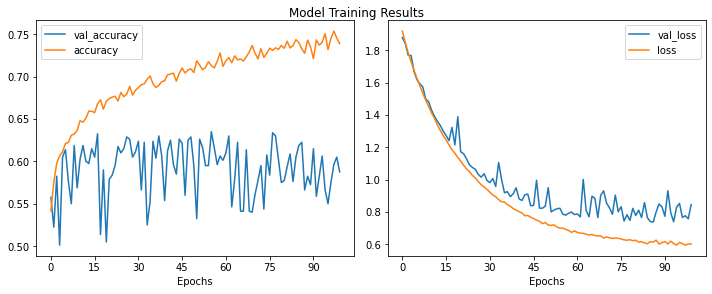



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.14      0.22      1000
           1       0.50      0.86      0.63      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.43      2000
weighted avg       0.50      0.50      0.43      2000



<Figure size 432x288 with 0 Axes>

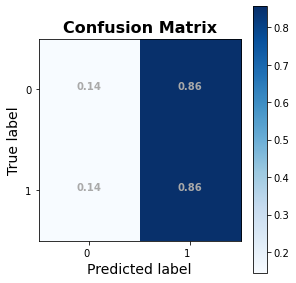

(<keras.engine.sequential.Sequential at 0x15b45c240>,
 array([[0.6554591 , 0.34454092],
        [0.27592224, 0.7240778 ],
        [0.10792704, 0.892073  ],
        ...,
        [0.62511736, 0.37488264],
        [0.15870279, 0.8412972 ],
        [0.2670375 , 0.7329624 ]], dtype=float32))

In [82]:
make_fit_evaluate_model(make_model_optimized)

## Keras Callbacks



- [Official Callback documentation](https://keras.io/callbacks/)
- CallBacks You'll Definitely Want to Use
 - `keras.callbacks.ModelCheckpoint`
 - `keras.callbacks.EarlyStopping`

- Callbacks worth further exploration
 - `keras.callbacks.callbacks.LearningRateScheduler`
 - `keras.callbacks`

### def callbacks

In [83]:
# checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

def create_checkpoint(monitor,model_subfolder):#='Datasets/Models/cat_vs_dog/'):
    filepath=model_subfolder+"weights-improvement-{epoch:02d}-{"+monitor+":.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_best_only=True, mode='max')
    return checkpoint

def create_early_stopping(monitor = 'val_accuracy',min_delta = 0, patience = 5,
                          verbose = 1, restore_best_weights = True):

    args = locals()
    earlystop = EarlyStopping(**args)
    return earlystop


def get_callbacks(early_stop_kws={}, checkpoint_kws={}):
    model_subfolder=base_folder+'Models/'
    os.makedirs(model_subfolder,exist_ok=True)

    callbacks_list = [create_checkpoint('val_accuracy',
                                        model_subfolder=model_subfolder,**checkpoint_kws),
                      create_early_stopping(**early_stop_kws)]
    return callbacks_list

In [84]:
base_folder

'/Users/jamesirving/Datasets/dogs-vs-cats-sorted/'

In [85]:
def make_fit_evaluate_model(build_fn, callbacks=None,
                            fit_params = dict(epochs=100,
                                              batch_size=128),verbose=0,):
    model = build_fn()
    
    timer = Timer()
    model.summary()
    timer.start()
    
    history = model.fit(X_train_img, y_train,**fit_params,
                        callbacks=callbacks,
                          validation_data=(X_val_img, y_val),
                        verbose=verbose,
                        workers=-1)
    timer.stop()
    
    y_hat_test = model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test,history)
    return model,y_hat_test

---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params:
{'activation': 'relu', 'optimizer': 'sgd', 'regularizer': <keras.regularizers.L1L2 object at 0x15b5e3b38>, 'n_units': 64}

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________
[i] Timer started at05/31/20 - 06:48 PM

Epoch 00001: val_accuracy improved from -inf to 0.53875, saving model to /Users/jamesirving/Datasets/dogs-vs-cats-sorted/Models/weights-improvement-01-0.54.hdf5

Epoch 00002

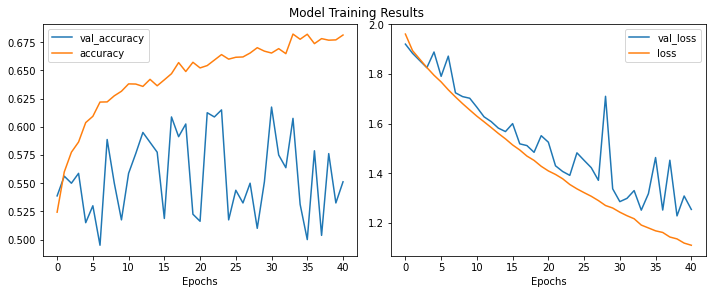



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1000
           1       0.50      0.51      0.51      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



<Figure size 432x288 with 0 Axes>

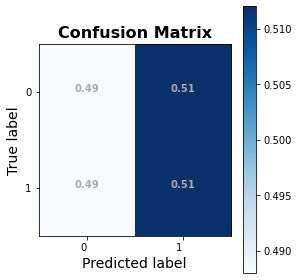

In [86]:
callbacks_list = get_callbacks(early_stop_kws={'patience':10})
model,preds= make_fit_evaluate_model(make_model_optimized,callbacks=callbacks_list)

# GridSearchCV


In [87]:
from sklearn.model_selection._search import BaseSearchCV

from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, recall_score

In [88]:
from sklearn.metrics import make_scorer
def my_custom_scorer(y_true,y_pred,verbose=True):#,scoring='accuracy',verbose=True):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""

    import sklearn.metrics as metrics
    from sklearn.metrics import confusion_matrix
    import numpy as np

    ## reduce dimensions of y_train and y_test
    if y_true.ndim>1:            
        y_true = y_true.argmax(axis=1)

    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)
        
    evaluate_model(y_true,y_pred)
    print('\n\n')
    return metrics.recall_score(y_true,y_pred,average='weighted')

In [89]:
def evaluate_gridsearch(search,X_test_img, y_test,verbose=True):
    best_model = search.best_estimator_.model
    if verbose: best_model.summary()
    history = best_model.history.history
    plot_keras_history(history)
    y_hat_test = best_model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test)

    return best_model, y_hat_test

In [90]:
dashes='---'

params_ =locals()
params_['dashes']

'---'

In [91]:
params_.pop('dashes')
params_.get('dashes','Error! Dashes not found')

'Error! Dashes not found'

In [92]:
def make_model_optimized(n_units=64,
                         regularizer='l2', l2_lr = 1e-2,
                         optimizer='sgd',activation='relu',
                         for_gridsearch=True):
    ## Save input args for display
    params=locals()

    ## Display headers
    if for_gridsearch:
        dashes = '---'*25
        print('\n\n')
        print(dashes)
        print(dashes)
        print('[i] Current Params = ',end="{\n")

        [print(f"\t\t{k} : {v},") for k,v in params.items()]
        print("\t\t}")
    
    
    ## Regularization control
    if regularizer =='l2':
        regularizer = regularizers.l2(l2_lr)
    else:
        regularizer = None
    
    model = Sequential()
    model.add(Dense(n_units,activation=activation,
                    input_shape=(X_train_img.shape[1],),
                    kernel_regularizer=regularizer))
    
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])
    if for_gridsearch:
        display(model.summary())
    return model

make_model_optimized()





---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : sgd,
		l2_lr : 0.01,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

In [95]:
classifier = KerasClassifier(build_fn=make_model_optimized)
callbacks = get_callbacks(early_stop_kws={'patience':10},
                         checkpoint_kws={})
#https://stackoverflow.com/questions/59818584/cannot-clone-object-keras-wrappers
params = dict(n_units=[64],
              optimizer=['rmsprop','adam'],
              epochs=(50,),
              regularizer = [None,'l2'],
              l2_lr  = [1e-2, 1e-3])
#              callbacks=[get_callbacks(early_stop_kws={'patience':10})])

search = GridSearchCV(classifier,params,cv=3,
                      scoring=make_scorer(my_custom_scorer))
search

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x15a5d29e8>,
             param_grid={'epochs': (50,), 'l2_lr': [0.01, 0.001],
                         'n_units': [64], 'optimizer': ['rmsprop', 'adam'],
                         'regularizer': [None, 'l2']},
             scoring=make_scorer(my_custom_scorer))




---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.01,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_84 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.7754 - accuracy: 0.5190 - val_loss: 0.6911 - val_accuracy: 0.5475

Epoch 00001: val_accuracy improved from -inf to 0.54750, saving model to /Users/jamesirving/Datasets/dogs-vs-cats-sorted/Models/weights-improvement-01-0.55.hdf5
Epoch 2/50
 - 0s - loss: 0.6877 - accuracy: 0.5598 - val_loss: 0.6802 - val_accuracy: 0.5688

Epoch 00002: val_accuracy improved from 0.54750 to 0.56875, saving model to /Users/jamesirving/Datasets/dogs-vs-cats-sorted/Models/weights-improvement-02-0.57.hdf5
Epoch 3/50
 - 0s - loss: 0.6779 - accuracy: 0.5719 - val_loss: 0.7188 - val_accuracy: 0.5113

Epoch 00003: val_accuracy did not improve from 0.56875
Epoch 4/50
 - 0s - loss: 0.6764 - accuracy: 0.5785 - val_loss: 0.6875 - val_accuracy: 0.5487

Epoch 00004: val_accuracy did not improve from 0.56875
Epoch 5/50
 - 0s - loss: 0.6726 - accuracy: 0.5817 - val_loss: 0.6847 - val_accuracy: 0.5587

Epoch 00005: val_accuracy did not improve from 0

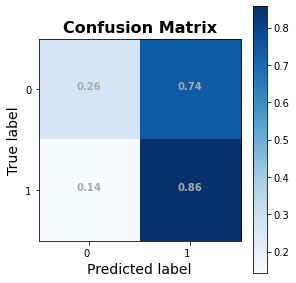







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.01,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_86 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 1.7589 - accuracy: 0.5044 - val_loss: 1.1529 - val_accuracy: 0.5038

Epoch 00001: val_accuracy did not improve from 0.58000
Epoch 2/50
 - 0s - loss: 1.0922 - accuracy: 0.5092 - val_loss: 0.7909 - val_accuracy: 0.4975

Epoch 00002: val_accuracy did not improve from 0.58000
Epoch 3/50
 - 0s - loss: 0.8217 - accuracy: 0.5225 - val_loss: 0.6779 - val_accuracy: 0.5850

Epoch 00003: val_accuracy improved from 0.58000 to 0.58500, saving model to /Users/jamesirving/Datasets/dogs-vs-cats-sorted/Models/weights-improvement-03-0.58.hdf5
Epoch 4/50
 - 0s - loss: 0.7110 - accuracy: 0.5525 - val_loss: 0.6778 - val_accuracy: 0.5975

Epoch 00004: val_accuracy improved from 0.58500 to 0.59750, saving model to /Users/jamesirving/Datasets/dogs-vs-cats-sorted/Models/weights-improvement-04-0.60.hdf5
Epoch 5/50
 - 0s - loss: 0.6741 - accuracy: 0.5788 - val_loss: 0.6816 - val_accuracy: 0.5725

Epoch 00005: val_accuracy did not improve fro

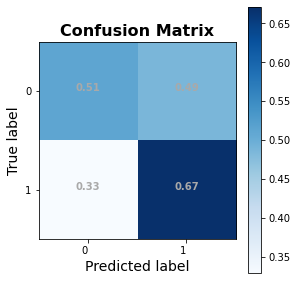







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.01,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_88 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 1.3037 - accuracy: 0.5175 - val_loss: 1.2792 - val_accuracy: 0.4938

Epoch 00001: val_accuracy did not improve from 0.62000
Epoch 2/50
 - 0s - loss: 0.9832 - accuracy: 0.5129 - val_loss: 1.1026 - val_accuracy: 0.4938

Epoch 00002: val_accuracy did not improve from 0.62000
Epoch 3/50
 - 0s - loss: 0.7852 - accuracy: 0.5319 - val_loss: 0.6925 - val_accuracy: 0.5300

Epoch 00003: val_accuracy did not improve from 0.62000
Epoch 4/50
 - 0s - loss: 0.7063 - accuracy: 0.5358 - val_loss: 0.6974 - val_accuracy: 0.5450

Epoch 00004: val_accuracy did not improve from 0.62000
Epoch 5/50
 - 0s - loss: 0.6783 - accuracy: 0.5702 - val_loss: 0.6897 - val_accuracy: 0.5350

Epoch 00005: val_accuracy did not improve from 0.62000
Epoch 6/50
 - 0s - loss: 0.6658 - accuracy: 0.5919 - val_loss: 0.6996 - val_accuracy: 0.5525

Epoch 00006: val_accuracy did not improve from 0.62000
Epoch 7/50
 - 0s - loss: 0.6598 - accuracy: 0.6075 - val_lo

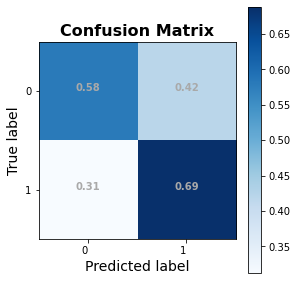







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.01,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_90 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 1.1987 - accuracy: 0.5233 - val_loss: 0.8610 - val_accuracy: 0.5063

Epoch 00001: val_accuracy did not improve from 0.62000
Epoch 2/50
 - 0s - loss: 0.9117 - accuracy: 0.5358 - val_loss: 0.7194 - val_accuracy: 0.5337

Epoch 00002: val_accuracy did not improve from 0.62000
Epoch 3/50
 - 0s - loss: 1.0573 - accuracy: 0.5056 - val_loss: 0.8588 - val_accuracy: 0.5063

Epoch 00003: val_accuracy did not improve from 0.62000
Epoch 4/50
 - 0s - loss: 1.1921 - accuracy: 0.5073 - val_loss: 0.8727 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.62000
Epoch 5/50
 - 0s - loss: 1.0419 - accuracy: 0.5227 - val_loss: 0.8834 - val_accuracy: 0.4925

Epoch 00005: val_accuracy did not improve from 0.62000
Epoch 6/50
 - 0s - loss: 1.0733 - accuracy: 0.5158 - val_loss: 0.7877 - val_accuracy: 0.5013

Epoch 00006: val_accuracy did not improve from 0.62000
Epoch 7/50
 - 0s - loss: 0.8868 - accuracy: 0.5210 - val_lo

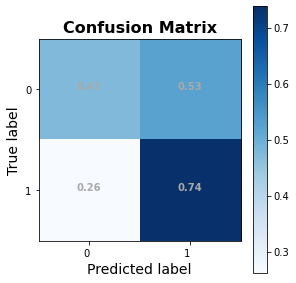







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.01,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 1.7514 - accuracy: 0.5096 - val_loss: 2.4642 - val_accuracy: 0.5063

Epoch 00001: val_accuracy did not improve from 0.62000
Epoch 2/50
 - 0s - loss: 1.3971 - accuracy: 0.5060 - val_loss: 1.2311 - val_accuracy: 0.4963

Epoch 00002: val_accuracy did not improve from 0.62000
Epoch 3/50
 - 0s - loss: 1.2872 - accuracy: 0.5031 - val_loss: 1.3376 - val_accuracy: 0.4938

Epoch 00003: val_accuracy did not improve from 0.62000
Epoch 4/50
 - 0s - loss: 1.1504 - accuracy: 0.5198 - val_loss: 0.8193 - val_accuracy: 0.5188

Epoch 00004: val_accuracy did not improve from 0.62000
Epoch 5/50
 - 0s - loss: 0.9329 - accuracy: 0.5408 - val_loss: 1.1395 - val_accuracy: 0.4938

Epoch 00005: val_accuracy did not improve from 0.62000
Epoch 6/50
 - 0s - loss: 0.8092 - accuracy: 0.5396 - val_loss: 0.7481 - val_accuracy: 0.5188

Epoch 00006: val_accuracy did not improve from 0.62000
Epoch 7/50
 - 0s - loss: 0.7636 - accuracy: 0.5273 - val_lo

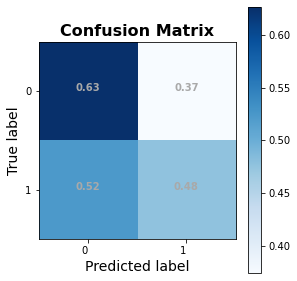







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.01,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_94 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 1.0777 - accuracy: 0.5225 - val_loss: 0.7397 - val_accuracy: 0.5350

Epoch 00001: val_accuracy did not improve from 0.62000
Epoch 2/50
 - 0s - loss: 0.7932 - accuracy: 0.5171 - val_loss: 0.9833 - val_accuracy: 0.4938

Epoch 00002: val_accuracy did not improve from 0.62000
Epoch 3/50
 - 0s - loss: 0.8417 - accuracy: 0.5208 - val_loss: 0.6955 - val_accuracy: 0.5587

Epoch 00003: val_accuracy did not improve from 0.62000
Epoch 4/50
 - 0s - loss: 0.7672 - accuracy: 0.5223 - val_loss: 0.7012 - val_accuracy: 0.5387

Epoch 00004: val_accuracy did not improve from 0.62000
Epoch 5/50
 - 0s - loss: 0.7750 - accuracy: 0.5252 - val_loss: 0.6986 - val_accuracy: 0.5038

Epoch 00005: val_accuracy did not improve from 0.62000
Epoch 6/50
 - 0s - loss: 0.7980 - accuracy: 0.5156 - val_loss: 1.0197 - val_accuracy: 0.5063

Epoch 00006: val_accuracy did not improve from 0.62000
Epoch 7/50
 - 0s - loss: 0.9453 - accuracy: 0.5175 - val_lo

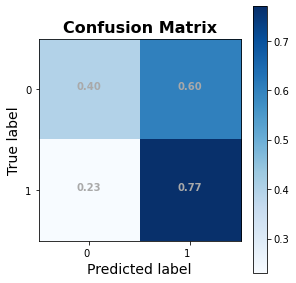







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.01,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_96 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.7181 - accuracy: 0.5235 - val_loss: 0.6900 - val_accuracy: 0.5587

Epoch 00001: val_accuracy did not improve from 0.62000
Epoch 2/50
 - 0s - loss: 0.6854 - accuracy: 0.5562 - val_loss: 0.6801 - val_accuracy: 0.5763

Epoch 00002: val_accuracy did not improve from 0.62000
Epoch 3/50
 - 0s - loss: 0.6690 - accuracy: 0.5940 - val_loss: 0.6748 - val_accuracy: 0.5875

Epoch 00003: val_accuracy did not improve from 0.62000
Epoch 4/50
 - 0s - loss: 0.6610 - accuracy: 0.6073 - val_loss: 0.7124 - val_accuracy: 0.5263

Epoch 00004: val_accuracy did not improve from 0.62000
Epoch 5/50
 - 0s - loss: 0.6568 - accuracy: 0.6087 - val_loss: 0.6735 - val_accuracy: 0.5838

Epoch 00005: val_accuracy did not improve from 0.62000
Epoch 6/50
 - 0s - loss: 0.6568 - accuracy: 0.6021 - val_loss: 0.6750 - val_accuracy: 0.5813

Epoch 00006: val_accuracy did not improve from 0.62000
Epoch 7/50
 - 0s - loss: 0.6499 - accuracy: 0.6194 - val_lo

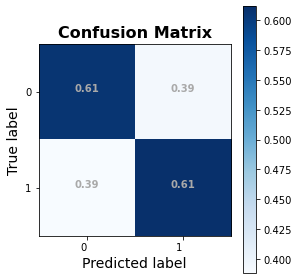







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.01,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_98 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.7439 - accuracy: 0.5390 - val_loss: 0.8040 - val_accuracy: 0.5238

Epoch 00001: val_accuracy did not improve from 0.62000
Epoch 2/50
 - 0s - loss: 0.6955 - accuracy: 0.5802 - val_loss: 0.6893 - val_accuracy: 0.5838

Epoch 00002: val_accuracy did not improve from 0.62000
Epoch 3/50
 - 0s - loss: 0.7061 - accuracy: 0.5838 - val_loss: 0.6679 - val_accuracy: 0.5975

Epoch 00003: val_accuracy did not improve from 0.62000
Epoch 4/50
 - 0s - loss: 0.6590 - accuracy: 0.6060 - val_loss: 0.8056 - val_accuracy: 0.5387

Epoch 00004: val_accuracy did not improve from 0.62000
Epoch 5/50
 - 0s - loss: 0.6752 - accuracy: 0.6042 - val_loss: 0.6848 - val_accuracy: 0.5813

Epoch 00005: val_accuracy did not improve from 0.62000
Epoch 6/50
 - 0s - loss: 0.6529 - accuracy: 0.6190 - val_loss: 0.7873 - val_accuracy: 0.5100

Epoch 00006: val_accuracy did not improve from 0.62000
Epoch 7/50
 - 0s - loss: 0.6328 - accuracy: 0.6394 - val_lo

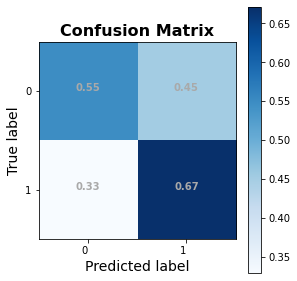







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.01,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_100 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 1s - loss: 0.7647 - accuracy: 0.5267 - val_loss: 0.7769 - val_accuracy: 0.5175

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.6896 - accuracy: 0.5573 - val_loss: 0.7361 - val_accuracy: 0.5263

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.6860 - accuracy: 0.5754 - val_loss: 0.6817 - val_accuracy: 0.5625

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6726 - accuracy: 0.5827 - val_loss: 0.6763 - val_accuracy: 0.5650

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6614 - accuracy: 0.6065 - val_loss: 0.6929 - val_accuracy: 0.5387

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6522 - accuracy: 0.6144 - val_loss: 0.6755 - val_accuracy: 0.5825

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6485 - accuracy: 0.6179 - val_lo

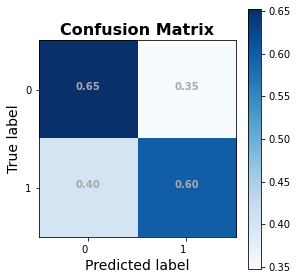







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.01,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_102 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 1.3463 - accuracy: 0.4971 - val_loss: 0.9778 - val_accuracy: 0.4938

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.8580 - accuracy: 0.5002 - val_loss: 0.7751 - val_accuracy: 0.5063

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7417 - accuracy: 0.4998 - val_loss: 0.7178 - val_accuracy: 0.5063

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.7064 - accuracy: 0.5031 - val_loss: 0.6996 - val_accuracy: 0.4925

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6969 - accuracy: 0.5119 - val_loss: 0.6947 - val_accuracy: 0.5063

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6941 - accuracy: 0.5033 - val_loss: 0.6934 - val_accuracy: 0.5063

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6934 - accuracy: 0.5033 - val_lo

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



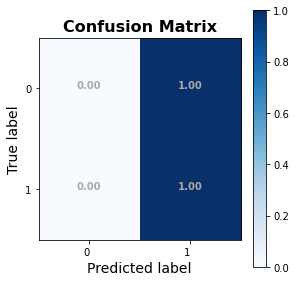







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.01,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_104 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 1s - loss: 1.3805 - accuracy: 0.5344 - val_loss: 0.9680 - val_accuracy: 0.5663

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.8946 - accuracy: 0.5660 - val_loss: 0.8340 - val_accuracy: 0.5225

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7845 - accuracy: 0.5844 - val_loss: 0.7760 - val_accuracy: 0.5500

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.7442 - accuracy: 0.5769 - val_loss: 0.7519 - val_accuracy: 0.5300

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.7126 - accuracy: 0.6048 - val_loss: 0.7161 - val_accuracy: 0.5975

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.7023 - accuracy: 0.6019 - val_loss: 0.7078 - val_accuracy: 0.5825

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6859 - accuracy: 0.6083 - val_lo

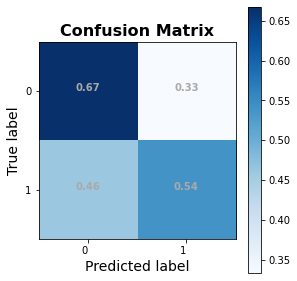







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.01,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_106 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 1s - loss: 1.3131 - accuracy: 0.5254 - val_loss: 0.9555 - val_accuracy: 0.5587

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.8743 - accuracy: 0.5437 - val_loss: 0.8165 - val_accuracy: 0.5150

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7505 - accuracy: 0.5825 - val_loss: 0.7275 - val_accuracy: 0.5800

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.7010 - accuracy: 0.6004 - val_loss: 0.7407 - val_accuracy: 0.5163

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.7115 - accuracy: 0.5638 - val_loss: 0.7109 - val_accuracy: 0.5800

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6962 - accuracy: 0.5769 - val_loss: 0.6993 - val_accuracy: 0.5663

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6905 - accuracy: 0.5731 - val_lo

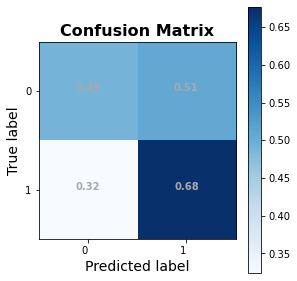







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.001,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_108 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 1.1052 - accuracy: 0.5035 - val_loss: 0.8588 - val_accuracy: 0.4925

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.7949 - accuracy: 0.5196 - val_loss: 0.6751 - val_accuracy: 0.5800

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7347 - accuracy: 0.5456 - val_loss: 0.6739 - val_accuracy: 0.5763

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.7299 - accuracy: 0.5685 - val_loss: 0.6908 - val_accuracy: 0.5688

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.7136 - accuracy: 0.5731 - val_loss: 0.6782 - val_accuracy: 0.5638

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6878 - accuracy: 0.5908 - val_loss: 0.6753 - val_accuracy: 0.5975

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6851 - accuracy: 0.6094 - val_lo

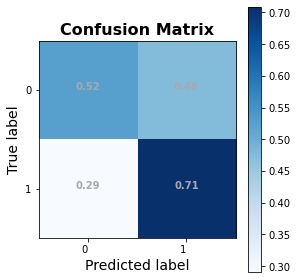







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.001,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_110 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.8489 - accuracy: 0.5273 - val_loss: 0.6922 - val_accuracy: 0.5213

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.7065 - accuracy: 0.5550 - val_loss: 0.7021 - val_accuracy: 0.5300

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7009 - accuracy: 0.5565 - val_loss: 0.6933 - val_accuracy: 0.5362

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6908 - accuracy: 0.5729 - val_loss: 0.7059 - val_accuracy: 0.5575

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6812 - accuracy: 0.5746 - val_loss: 0.6767 - val_accuracy: 0.5775

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6675 - accuracy: 0.5954 - val_loss: 0.6754 - val_accuracy: 0.5875

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6596 - accuracy: 0.6117 - val_lo

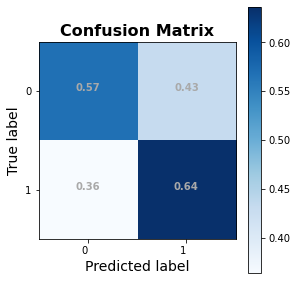







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.001,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_112 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.9291 - accuracy: 0.5231 - val_loss: 0.7047 - val_accuracy: 0.5200

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.6831 - accuracy: 0.5581 - val_loss: 0.6871 - val_accuracy: 0.5500

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.6764 - accuracy: 0.5760 - val_loss: 0.6763 - val_accuracy: 0.5863

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6710 - accuracy: 0.5892 - val_loss: 0.6842 - val_accuracy: 0.5562

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6643 - accuracy: 0.5987 - val_loss: 0.6764 - val_accuracy: 0.5888

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6546 - accuracy: 0.6160 - val_loss: 0.6855 - val_accuracy: 0.5688

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6522 - accuracy: 0.6244 - val_lo

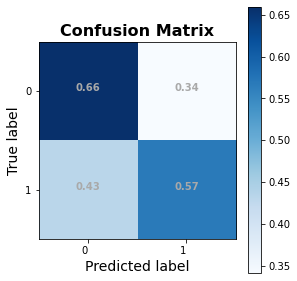







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.001,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_114 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.8252 - accuracy: 0.5271 - val_loss: 0.6938 - val_accuracy: 0.5250

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.7699 - accuracy: 0.5227 - val_loss: 1.0770 - val_accuracy: 0.4938

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7777 - accuracy: 0.5283 - val_loss: 0.7213 - val_accuracy: 0.5362

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.7926 - accuracy: 0.5469 - val_loss: 0.7054 - val_accuracy: 0.5462

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.7995 - accuracy: 0.5448 - val_loss: 1.0354 - val_accuracy: 0.5113

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 1.0338 - accuracy: 0.5240 - val_loss: 1.0499 - val_accuracy: 0.5175

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 1.0083 - accuracy: 0.5325 - val_lo

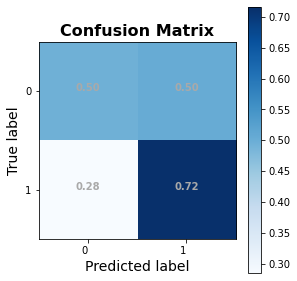







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.001,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_116 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.9585 - accuracy: 0.5273 - val_loss: 0.7156 - val_accuracy: 0.5063

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 1.0184 - accuracy: 0.5150 - val_loss: 0.7203 - val_accuracy: 0.5200

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 1.0198 - accuracy: 0.5133 - val_loss: 1.0163 - val_accuracy: 0.4938

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 1.0058 - accuracy: 0.5273 - val_loss: 0.8989 - val_accuracy: 0.4938

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.9848 - accuracy: 0.5090 - val_loss: 0.7126 - val_accuracy: 0.5288

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 1.0024 - accuracy: 0.5165 - val_loss: 1.9986 - val_accuracy: 0.5063

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.9497 - accuracy: 0.5271 - val_lo

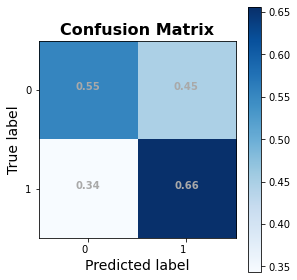







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : rmsprop,
		l2_lr : 0.001,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_118 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 1s - loss: 0.8798 - accuracy: 0.5183 - val_loss: 0.6965 - val_accuracy: 0.5663

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.7669 - accuracy: 0.5279 - val_loss: 0.7188 - val_accuracy: 0.5200

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7520 - accuracy: 0.5304 - val_loss: 0.6876 - val_accuracy: 0.5487

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.7173 - accuracy: 0.5444 - val_loss: 0.7315 - val_accuracy: 0.5163

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.7250 - accuracy: 0.5433 - val_loss: 0.6844 - val_accuracy: 0.5725

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.7952 - accuracy: 0.5412 - val_loss: 0.8893 - val_accuracy: 0.5088

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.8166 - accuracy: 0.5431 - val_lo

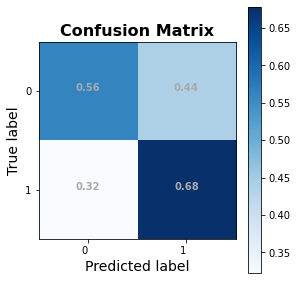







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.001,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_120 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.7283 - accuracy: 0.5331 - val_loss: 0.6961 - val_accuracy: 0.5088

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.6804 - accuracy: 0.5635 - val_loss: 0.6797 - val_accuracy: 0.5675

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.6764 - accuracy: 0.5796 - val_loss: 0.6772 - val_accuracy: 0.5775

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6754 - accuracy: 0.5802 - val_loss: 0.6770 - val_accuracy: 0.5875

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6632 - accuracy: 0.5865 - val_loss: 0.6769 - val_accuracy: 0.5775

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6630 - accuracy: 0.6019 - val_loss: 0.6803 - val_accuracy: 0.5738

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6563 - accuracy: 0.6077 - val_lo

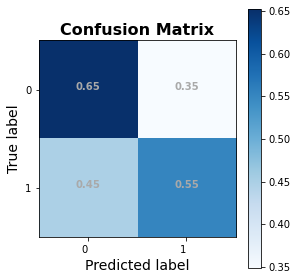







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.001,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_122 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.7199 - accuracy: 0.5390 - val_loss: 0.7506 - val_accuracy: 0.5300

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.6849 - accuracy: 0.5671 - val_loss: 0.6803 - val_accuracy: 0.5625

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.6753 - accuracy: 0.5817 - val_loss: 0.6901 - val_accuracy: 0.5512

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6652 - accuracy: 0.5985 - val_loss: 0.6745 - val_accuracy: 0.6087

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6565 - accuracy: 0.6106 - val_loss: 0.6693 - val_accuracy: 0.5962

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6395 - accuracy: 0.6381 - val_loss: 0.7099 - val_accuracy: 0.5325

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6472 - accuracy: 0.6183 - val_lo

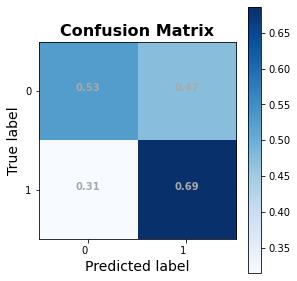







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.001,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_124 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.7152 - accuracy: 0.5402 - val_loss: 0.6785 - val_accuracy: 0.5688

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.6745 - accuracy: 0.5790 - val_loss: 0.6808 - val_accuracy: 0.5738

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.6646 - accuracy: 0.5994 - val_loss: 0.7044 - val_accuracy: 0.5600

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6546 - accuracy: 0.6135 - val_loss: 0.7434 - val_accuracy: 0.5562

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6550 - accuracy: 0.6119 - val_loss: 0.6781 - val_accuracy: 0.5987

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6477 - accuracy: 0.6248 - val_loss: 0.6890 - val_accuracy: 0.5700

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6422 - accuracy: 0.6237 - val_lo

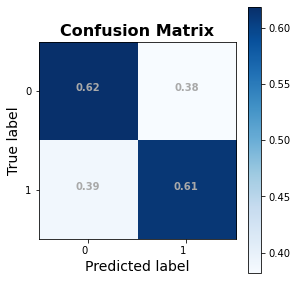







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.001,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_126 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.8057 - accuracy: 0.5358 - val_loss: 0.7679 - val_accuracy: 0.5150

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.7391 - accuracy: 0.5648 - val_loss: 0.7251 - val_accuracy: 0.5825

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7168 - accuracy: 0.5744 - val_loss: 0.7205 - val_accuracy: 0.5600

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6970 - accuracy: 0.6008 - val_loss: 0.7012 - val_accuracy: 0.5875

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6825 - accuracy: 0.6048 - val_loss: 0.6897 - val_accuracy: 0.6050

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6670 - accuracy: 0.6179 - val_loss: 0.7006 - val_accuracy: 0.5688

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6630 - accuracy: 0.6215 - val_lo

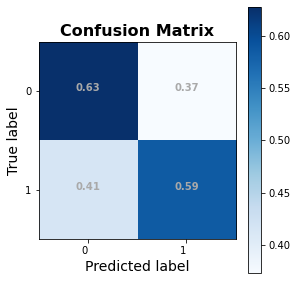







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.001,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_128 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.8379 - accuracy: 0.5227 - val_loss: 0.7653 - val_accuracy: 0.5550

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.7489 - accuracy: 0.5471 - val_loss: 0.7520 - val_accuracy: 0.5125

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7290 - accuracy: 0.5575 - val_loss: 0.7386 - val_accuracy: 0.5325

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.7144 - accuracy: 0.5769 - val_loss: 0.7327 - val_accuracy: 0.5412

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6962 - accuracy: 0.5860 - val_loss: 0.7092 - val_accuracy: 0.5763

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6916 - accuracy: 0.5971 - val_loss: 0.7064 - val_accuracy: 0.5688

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6843 - accuracy: 0.6042 - val_lo

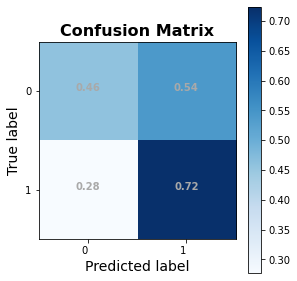







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.001,
		regularizer : l2,
		n_units : 64,
		}
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_130 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
 - 0s - loss: 0.8250 - accuracy: 0.5315 - val_loss: 0.7531 - val_accuracy: 0.5600

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.7386 - accuracy: 0.5663 - val_loss: 0.7329 - val_accuracy: 0.5600

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.7194 - accuracy: 0.5700 - val_loss: 0.7337 - val_accuracy: 0.5337

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6979 - accuracy: 0.5975 - val_loss: 0.7003 - val_accuracy: 0.5925

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6847 - accuracy: 0.6037 - val_loss: 0.7224 - val_accuracy: 0.5525

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6797 - accuracy: 0.6008 - val_loss: 0.6853 - val_accuracy: 0.5975

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6721 - accuracy: 0.6108 - val_lo

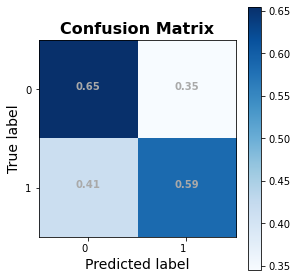







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		for_gridsearch : True,
		activation : relu,
		optimizer : adam,
		l2_lr : 0.01,
		regularizer : None,
		n_units : 64,
		}
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_132 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 7200 samples, validate on 800 samples
Epoch 1/50
 - 1s - loss: 0.7221 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4938

Epoch 00001: val_accuracy did not improve from 0.63000
Epoch 2/50
 - 0s - loss: 0.6932 - accuracy: 0.4943 - val_loss: 0.6933 - val_accuracy: 0.4938

Epoch 00002: val_accuracy did not improve from 0.63000
Epoch 3/50
 - 0s - loss: 0.6933 - accuracy: 0.4918 - val_loss: 0.6931 - val_accuracy: 0.5063

Epoch 00003: val_accuracy did not improve from 0.63000
Epoch 4/50
 - 0s - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4938

Epoch 00004: val_accuracy did not improve from 0.63000
Epoch 5/50
 - 0s - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4938

Epoch 00005: val_accuracy did not improve from 0.63000
Epoch 6/50
 - 0s - loss: 0.6932 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.4938

Epoch 00006: val_accuracy did not improve from 0.63000
Epoch 7/50
 - 0s - loss: 0.6932 - accuracy: 0.4974 - val_lo

{'epochs': 50,
 'l2_lr': 0.01,
 'n_units': 64,
 'optimizer': 'adam',
 'regularizer': None}

In [96]:
search.fit(X_train_img, y_train,
           validation_data=(X_val_img, y_val),
           verbose=2,workers=-1,
          callbacks=callbacks)

search.best_params_

In [97]:
search.cv_results_

{'mean_fit_time': array([6.00965571, 6.24975069, 7.28003867, 6.05376617, 8.59715708,
        9.98431993, 8.5989484 , 9.28450608]),
 'std_fit_time': array([0.88980783, 2.62778466, 0.91470751, 1.90184542, 1.88969966,
        1.73355952, 1.87513706, 4.51389089]),
 'mean_score_time': array([0.19259461, 0.17674271, 0.20689034, 0.20901958, 0.27854268,
        0.24670577, 0.24062228, 0.23422837]),
 'std_score_time': array([0.02782267, 0.00104145, 0.02105214, 0.02053425, 0.00708343,
        0.02090302, 0.01347124, 0.01430131]),
 'param_epochs': masked_array(data=[50, 50, 50, 50, 50, 50, 50, 50],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_l2_lr': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_units': masked_array(data=[64, 64, 64, 64, 64, 64

{'epochs': 50, 'l2_lr': 0.01, 'n_units': 64, 'optimizer': 'adam', 'regularizer': None}
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_132 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


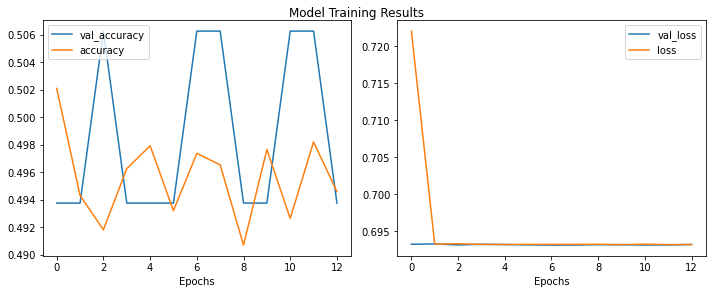



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Figure size 432x288 with 0 Axes>

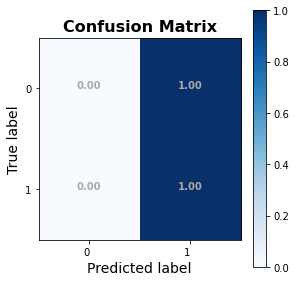

(<keras.engine.sequential.Sequential at 0x15ad80dd8>,
 array([[0.49981257, 0.50018746],
        [0.49981257, 0.50018746],
        [0.49981257, 0.50018746],
        ...,
        [0.49981257, 0.50018746],
        [0.49981257, 0.50018746],
        [0.49981257, 0.50018746]], dtype=float32))

In [98]:
print(search.best_params_)

evaluate_gridsearch(search,X_test_img,y_test)

# Making Modeling functions for gridsearching

In [99]:
fs.ihelp(evaluate_gridsearch)

------------------------------------------------------------------------------------
------ HELP ------------------------------------------------------------------------

Help on function evaluate_gridsearch in module __main__:

evaluate_gridsearch(search, X_test_img, y_test, verbose=True)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def evaluate_gridsearch(search,X_test_img, y_test,verbose=True):
    best_model = search.best_estimator_.model
    if verbose: best_model.summary()
    history = best_model.history.history
    plot_keras_history(history)
    y_hat_test = best_model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test)

    return best_model, y_hat_test

```

In [100]:
# fs.ihelp(plot_confusion_matrix,0)

In [101]:
def get_cv_results_df(search,keep_splits=False):
    ## Get cv_results
    cv_results = pd.DataFrame(search.cv_results_)
    cv_results.set_index('rank_test_score',inplace=True)
    cv_results.sort_index(inplace=True)
    # cv_results.style.background_gradient(subset='mean_test_score')


    keep_cols = ['mean_test_score','std_test_score',
                 'mean_fit_time','std_fit_time']
    keep_cols.extend([col for col in cv_results.columns if 'param_' in col])
    
    if keep_splits:
        keep_cols.extend([col for col in cv_results.columns if 'split' in col])

    cv_results= cv_results[keep_cols]
    return cv_results

In [102]:
cv_results= get_cv_results_df(search)
cv_results

,mean_test_score,std_test_score,mean_fit_time,std_fit_time,param_epochs,param_l2_lr,param_n_units,param_optimizer,param_regularizer
rank_test_score,,,,,,,,,
1,0.614722,0.007275,7.280039,0.914708,50,0.01,64,adam,None
2,0.610278,0.005594,8.597157,1.889700,50,0.001,64,rmsprop,None
3,0.609861,0.007760,9.984320,1.733560,50,0.001,64,rmsprop,l2
4,0.608056,0.005197,8.598948,1.875137,50,0.001,64,adam,None
5,0.605972,0.011408,9.284506,4.513891,50,0.001,64,adam,l2
6,0.593750,0.032863,6.009656,0.889808,50,0.01,64,rmsprop,None
7,0.580417,0.021605,6.249751,2.627785,50,0.01,64,rmsprop,l2
8,0.560000,0.049213,6.053766,1.901845,50,0.01,64,adam,l2


In [103]:
fpath="test/testing/search_results.pdf"
os.path.basename(fpath)
os.path.dirname(fpath)

'test/testing'

In [104]:
import os
## Make individual file paths from fpath base
fpath="output/search_results.pdf"


## Get base filepath and ext seperated
(fbase,ext) = os.path.splitext(fpath)

# ## Make folders if needed
# os.makedirs(os.path.dirname(fpath),exist_ok=True)

# ## Add file suffix for each piece
# filepaths = {}
# filepaths['history'] = fbase+"_history"+ext
# filepaths['conf_matrix'] = fbase+"conf_matrix"+ext
# filepaths['report'] = fbase+'_report'+ext
# filepaths

In [105]:
def plot_keras_history_new(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    
    ## Make a df from history
    plot_df = pd.DataFrame(history)#history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


    ## Change xaxis locators 
    [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
    [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig

In [106]:
def helper_filepaths(fpath):
    import os
  
    ## Get base filepath and ext seperated
    (fbase,ext) = os.path.splitext(fpath)
    dirname = os.path.dirname(fbase)
    
    if len(dirname)>0:
        ## Make folders if needed
        os.makedirs(dirname,exist_ok=True)

    ## Add file suffix for each piece
    filepaths = {}
    filepath_list = ['history','conf_matrix','report','cv_results']
    for filepath in filepath_list:
        filepaths[filepath] = f"{fbase}_{filepath}{ext}"
        
    return filepaths



def gridsearch_report(search,X_true,y_true,fpath = "search_result.pdf"):
    """PREPARES FULL GRID SEARCH REPORT AND SAVES FILE FOR EMAIL COMPOSITION"""

    from io import StringIO
    import os

    ## Get filepaths
    filepaths= helper_filepaths(fpath)
    
    
    ## Get Best Model, Model History
    best_model = search.best_estimator_.model
    history = best_model.history.history
    
    
    ## Get Predictions and Reports
    # Get Preds
    y_pred = best_model.predict(X_true)
    
    # Convert y-variables to 1D
    if np.ndim(y_pred) >1:
        y_pred = y_pred.argmax(axis=1)
    if np.ndim(y_true) >1:
        y_true = y_true.argmax(axis=1)    
    
    ## Use preds for classification report and conf matrix
    class_report = metrics.classification_report(y_true,y_pred) 
    
     ## Get best params
    grid_res = pd.DataFrame(search.best_params_,index=["Best Params"])
    grid_res['score'] = search.best_score_  
    
    
    ## Print Message:  
    num_dashes=20
    print('---'*num_dashes)
    print('\tGRIDSEARCH REPORT:')
    print('---'*num_dashes)      

    
    
    ### DISPLAY BEST MODEL DETAILS FIRST
    print("\nI. BEST MODEL DETAILS:")
    print('\ni. Best Params:')
    display(grid_res)      
    
    print('\nii. Classification Report:\n')
    print(class_report)
  

    ## Plot and save confusion matrix
    fig_cm = plot_confusion_matrix((y_true,y_pred))
    fig_cm.savefig(filepaths['conf_matrix'],dpi=300,pad_inches=0.6,
                papertype='letter',facecolor='w',edgecolor='w',
                        transparent=False)     
    plt.show()
   
    
    print("\niii. Training History")   
    ## Plot and save keras history
    fig_history = plot_keras_history_new(history)
    fig_history.savefig(filepaths['history'],dpi=300,pad_inches=0.6,
                papertype='letter',facecolor='w',edgecolor='w',
                        transparent=False)   
    plt.show()
   

    ## Get Model Summary
    s = StringIO()
    best_model.summary(print_fn=lambda x: s.write(x + '\n'))
    model_summary = s.getvalue()
    s.close()
    print('\n\niv. Model Summary:\n\n',model_summary)


    ### DISPLAY BIGGER_PICTURE CV RESULTS
    print("\n\nII. GRIDSEARCH DETAILS:")

    ## Param Grid
    param_grid = search.param_grid
    print('\n[i] Param Grid = ',end="{\n")
    [print(f"\t\t{k} : {v},") for k,v in param_grid.items()] 
    print("\t\t}")
    
    ## Get cv_results
    n=5
    cv_results =get_cv_results_df(search)    
    display(cv_results.head(n).style.set_caption(f'Top {n} Params'))
    
    
    ### SCAFFOLDING OF REPORT
    search_details = {}
    search_details['best_score'] = search.best_score_
    search_details['best_params'] = str(search.best_params_)
    search_details['param_grid'] = str(search.param_grid)
    search_details['cv_results'] = get_cv_results_df(search)    
    search_details['model_summary'] = model_summary
    search_details['class_report'] = class_report
    search_details['confusion_matrix'] = fig_cm
    search_details['history'] = fig_history
    
    search_details['model_config'] = best_model.get_config()
    search_details['filepaths'] = filepaths

    return search_details

------------------------------------------------------------
	GRIDSEARCH REPORT:
------------------------------------------------------------

I. BEST MODEL DETAILS:

i. Best Params:


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,epochs,l2_lr,n_units,optimizer,regularizer,score
Best Params,50,0.01,64,adam,None,0.614722



ii. Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



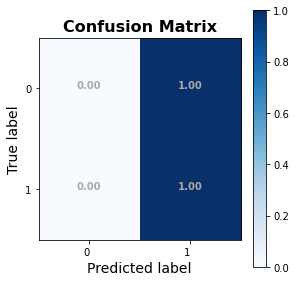


iii. Training History


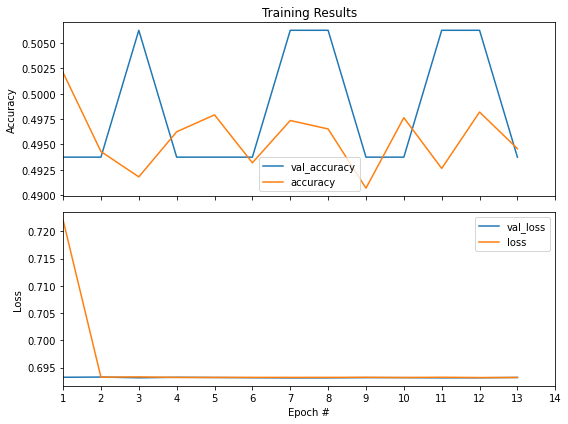



iv. Model Summary:

 Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_132 (Dense)            (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________



II. GRIDSEARCH DETAILS:

[i] Param Grid = {
		n_units : [64],
		optimizer : ['rmsprop', 'adam'],
		epochs : (50,),
		regularizer : [None, 'l2'],
		l2_lr : [0.01, 0.001],
		}


,mean_test_score,std_test_score,mean_fit_time,std_fit_time,param_epochs,param_l2_lr,param_n_units,param_optimizer,param_regularizer
rank_test_score,,,,,,,,,
1,0.614722,0.007275,7.280039,0.914708,50,0.010000,64,adam,None
2,0.610278,0.005594,8.597157,1.889700,50,0.001000,64,rmsprop,None
3,0.609861,0.007760,9.984320,1.733560,50,0.001000,64,rmsprop,l2
4,0.608056,0.005197,8.598948,1.875137,50,0.001000,64,adam,None
5,0.605972,0.011408,9.284506,4.513891,50,0.001000,64,adam,l2


In [107]:
grid_results = gridsearch_report(search,X_test_img,y_test)



### Constructing Email report

#### Adding Attachments Using the email Package

In order to send binary files to an email server that is designed to work with textual data, they need to be encoded before transport. This is most commonly done using base64, which encodes binary data into printable ASCII characters.

The code example below shows how to send an email with a PDF file as an attachment:
```python
import email, smtplib, ssl

from email import encoders
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

subject = "An email with attachment from Python"
body = "This is an email with attachment sent from Python"
sender_email = "my@gmail.com"
receiver_email = "your@gmail.com"
password = input("Type your password and press enter:")

# Create a multipart message and set headers
message = MIMEMultipart()
message["From"] = sender_email
message["To"] = receiver_email
message["Subject"] = subject
message["Bcc"] = receiver_email  # Recommended for mass emails

# Add body to email
message.attach(MIMEText(body, "plain"))

filename = "document.pdf"  # In same directory as script

# Open PDF file in binary mode
with open(filename, "rb") as attachment:
    # Add file as application/octet-stream
    # Email client can usually download this automatically as attachment
    part = MIMEBase("application", "octet-stream")
    part.set_payload(attachment.read())

# Encode file in ASCII characters to send by email    
encoders.encode_base64(part)

# Add header as key/value pair to attachment part
part.add_header(
    "Content-Disposition",
    f"attachment; filename= {filename}",
)

# Add attachment to message and convert message to string
message.attach(part)
text = message.as_string()

# Log in to server using secure context and send email
context = ssl.create_default_context()
with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, text)
    ```

In [121]:
figpath=grid_results['filepaths']['history']

In [122]:
import os
secret_folder = '/Users/jamesirving/.secret/'
login_info_file = secret_folder+'fsds_notifications_gmail.json'


def get_secret_password(file=None):#='/Users/jamesirving/.secret/gmail.json'):
    if file is None:
        secret_folder = '/Users/jamesirving/.secret/'
        file = secret_folder+'fsds_notifications_gmail.json'

    with open(file) as file:
        import json
        gmail = json.load(file)
    print(gmail.keys())
    return gmail

gmail = get_secret_password()
# gmail

dict_keys(['username', 'password'])


### Sending emails with Python

- https://realpython.com/python-send-email/


In [123]:
# import required packages
import smtplib,ssl
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase

from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email import encoders


sender_email = gmail['username']
receiver_email = "james.irving@flatironschool.com"
password = gmail['password']

message = MIMEMultipart("alternative")
message["Subject"] = "multipart test"
message["From"] = sender_email
message["To"] = receiver_email


# Create the plain-text and HTML version of your message
text = """\
Hello, 
This is a test email sent via python that should contain HTML + plain text."""

html = """\
<html>
 <head><h1>Test Email</h1></head>
  <body>
    <p>Hello,<br>
       This is a test email sent via python that should contain HTML + plain text.<br>
    </p>
  </body>
</html>
"""

# Turn these into plain/html MIMEText objects
part1 = MIMEText(text, "plain")
part2 = MIMEText(html, "html")

# Add HTML/plain-text parts to MIMEMultipart message
# The email client will try to render the last part first
message.attach(part1)
message.attach(part2)

In [124]:
# for file in list_of_files:
filename = figpath# In same directory as script

# Open PDF file in binary mode
with open(filename, "rb") as attachment:
    # Add file as application/octet-stream
    # Email client can usually download this automatically as attachment
    part = MIMEBase("application", "octet-stream")
    part.set_payload(attachment.read())

# Encode file in ASCII characters to send by email    
encoders.encode_base64(part)

# Add header as key/value pair to attachment part
part.add_header(
    "Content-Disposition",
    f"attachment; filename= {filename}",
)

# Add attachment to message and convert message to string
message.attach(part)

In [125]:
# Create secure connection with server and send email
context = ssl.create_default_context()
with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(
        sender_email, receiver_email, message.as_string()
    )

In [126]:
# filename = figpath# In same directory as script

# # Open PDF file in binary mode
# with open(filename, "rb") as attachment:
#     # Add file as application/octet-stream
#     # Email client can usually download this automatically as attachment
#     part = MIMEBase("application", "octet-stream")
#     part.set_payload(attachment.read())

# # Encode file in ASCII characters to send by email    
# encoders.encode_base64(part)

# # Add header as key/value pair to attachment part
# part.add_header(
#     "Content-Disposition",
#     f"attachment; filename= {filename}",
# )

# # Add attachment to message and convert message to string
# message.attach(part)

In [127]:
# def email_notification(password_obj=None,recipient=None,subject='GridSearch Finished',
#                        msg='The GridSearch is now complete.'):
#     """Sends email notification from gmail account using previously encrypyted password  object (an instance
#     of EncrypytedPassword). 
#     Args:
#         password_obj (dict): Login info dict with keys: username,password.
#         subject (str):Text for subject line.
#         msg (str): Text for body of email. 

#     Returns:
#         Prints `Email sent!` if email successful. 
#     """
#     if password_obj is None:
#         gmail = get_secret_password()
#     else:
#         assert ('username' in password_obj)&('password' in password_obj)
#         gmail = password_obj
        
#     if isinstance(msg,str)==False:
#         msg=str(msg)
        
    
#     # import required packages
#     import smtplib
#     from email.mime.multipart import MIMEMultipart
#     from email.mime.text import MIMEText
#     from email.mime.image import MIMEImage
#     from email import encoders
    

#     ## WRITE EMAIL
#     message = MIMEMultipart()
#     message['Subject'] =subject
    
#     if send_to is None:
#         recipient = gmail['username']

#     message['To'] = recipient
#     message['From'] = gmail['username']
    
#     message.attach(MIMEText(msg,'plain'))
#     text_message = message.as_string()


#     # Send email request
#     try:
#         with  smtplib.SMTP_SSL('smtp.gmail.com',465) as server:
            
#             server.login(gmail['username'],gmail['password'])
#             server.sendmail(gmail['username'],gmail['username'], text_message)#text_message)
#             server.close()
#             print(f"Email sent to {gmail['username']}!")
        
#     except Exception as e:
#         print(e)
#         print('Something went wrong')
       
       
       

## Lime 

- https://github.com/expectopatronum/code-snippets-blog/blob/master/python/201808_catdog_classifier_lime/analyse-cat-dog-classifier.ipynb

In [ ]:
# # !pip install lime
# import lime
# from lime import lime_image
# from lime import lime_base
# from lime.wrappers.scikit_image import SegmentationAlgorithm
# from skimage.segmentation import mark_boundaries


# explainer = lime_image.LimeImageExplainer()

In [ ]:
# def explain_single_sample(dataset, idx):
#     img_data = dataset[idx][0]
#     data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
#     model_out = model.predict([data])[0]
#     label = 0
#     label_name = "cat"
#     if model_out[1] > 0.5:
#         label = 1
#         label_name = "dog"
#     explanation = explainer.explain_instance(data, model.predict, top_labels=2, hide_color=None, num_samples=1000)
#     temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=True)
#     fig, ax = plt.subplots(1,3)
#     ax[0].imshow(img_data)
#     #plt.subplot(1, 2, 1)
#     ax[1].imshow(mark_boundaries(temp, mask))
#     #plt.show()
#     #plt.subplot(1, 2, 2)
#     temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)
#     ax[2].imshow(mark_boundaries(temp, mask))
#     plt.show()
#     print("label: ", dataset[idx][1], "prediction:", label_name)